In [2]:
! pwd

/content


In [37]:
! ls /content/drive/My\ Drive/Colab\ Notebooks/lfw_funneled #get name of folders and files present in my directory

Colin_Powell	 Gerhard_Schroeder  pairs_03.txt  pairs_07.txt	pairs.txt
data.pkl	 index_file.pkl     pairs_04.txt  pairs_08.txt	Tony_Blair
Donald_Rumsfeld  pairs_01.txt	    pairs_05.txt  pairs_09.txt
George_W_Bush	 pairs_02.txt	    pairs_06.txt  pairs_10.txt


In [38]:
# 1.3 Python code to list files and folders

import os
directory = r'/content/drive/My Drive/Colab Notebooks/lfw_funneled/'
cnt = 0

for subfolder in os.listdir(directory):
  p = directory+subfolder
  if os.path.isdir(p):
    
    print(p)
    print("****************************")

    for f in os.listdir(p):
      #get name of jpg file
      if f.endswith(".jpg"):
        fname = p + "/" + f
        print(fname)
        cnt += 1
print(cnt)

/content/drive/My Drive/Colab Notebooks/lfw_funneled/Donald_Rumsfeld
****************************
/content/drive/My Drive/Colab Notebooks/lfw_funneled/Donald_Rumsfeld/Donald_Rumsfeld_0065.jpg
/content/drive/My Drive/Colab Notebooks/lfw_funneled/Donald_Rumsfeld/Donald_Rumsfeld_0038.jpg
/content/drive/My Drive/Colab Notebooks/lfw_funneled/Donald_Rumsfeld/Donald_Rumsfeld_0020.jpg
/content/drive/My Drive/Colab Notebooks/lfw_funneled/Donald_Rumsfeld/Donald_Rumsfeld_0047.jpg
/content/drive/My Drive/Colab Notebooks/lfw_funneled/Donald_Rumsfeld/Donald_Rumsfeld_0032.jpg
/content/drive/My Drive/Colab Notebooks/lfw_funneled/Donald_Rumsfeld/Donald_Rumsfeld_0121.jpg
/content/drive/My Drive/Colab Notebooks/lfw_funneled/Donald_Rumsfeld/Donald_Rumsfeld_0113.jpg
/content/drive/My Drive/Colab Notebooks/lfw_funneled/Donald_Rumsfeld/Donald_Rumsfeld_0050.jpg
/content/drive/My Drive/Colab Notebooks/lfw_funneled/Donald_Rumsfeld/Donald_Rumsfeld_0013.jpg
/content/drive/My Drive/Colab Notebooks/lfw_funneled/Don

<class 'numpy.ndarray'>
(250, 250)


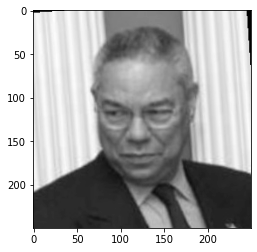

In [39]:
import cv2
import numpy as np

# load the image,we will be loading image as grayscale for simplicity because it has only 2 dim(corrs to wb) whereas color image would 3 dim (corrs to rgb)
# cv2.imread loads an image from the specified file and returns it as ndarray 
# Load an color image in grayscale
# Refer:https://docs.opencv.org/2.4/modules/highgui/doc/reading_and_writing_images_and_video.html?highlight=imread#imread
im = cv2.imread('/content/drive/My Drive/Colab Notebooks/lfw_funneled/Colin_Powell/Colin_Powell_0050.jpg',0) # 0 for grayscale 
print(type(im)) 
print(im.shape)
# show the image using MatPlotLib 
import matplotlib.pyplot as plt
plt.imshow(im, cmap=plt.get_cmap('gray')) #Display data as an images (grayscale here) 
plt.show()

In [40]:
# construction of data matrix where each row represent perticular image out of 1140. so no of colums would be 62500(250*250)
# and our data matrix will have dim of 1140*62500

# reshape im to a row vector
d = 62500 # dim of each image
imVec = np.reshape(im,(1,d)) # row-vector 1 X 62500
print(imVec.shape) 


(1, 62500)


In [0]:
# Make a function out of it
def loadImage(fileName):
  # load the image
  # Load an color image in grayscale
  # Refer:https://docs.opencv.org/2.4/modules/highgui/doc/reading_and_writing_images_and_video.html?highlight=imread#imread
  im = cv2.imread(fileName,0)

  # reshape im to a vector
  d = 62500 # dim of each image
  imVec = np.reshape(im,(1,d)) # row-vector 1 X 62500
  return imVec

In [0]:
# 1.5 Build a Data-Matrix with each row as an image
n = 1140
d = 62500
data=np.zeros((n,d))
index_file=dict() # key:row index , val: file path
labels=[] # one unique number for all images indicating which folder it belongs to 
# Reusing the code above to ietarte through each folder and image
import os
directory = r'/content/drive/My Drive/Colab Notebooks/lfw_funneled/'

i=0
folderNum=-1;

for subfolder in os.listdir(directory): # for each folder
  p = directory+subfolder
  
  if os.path.isdir(p): # check for subfolders
    folderNum += 1;

    for f in os.listdir(p):
      
      if f.endswith(".jpg"): # check for image files
        fname = p + "/" + f
        
        data[i,:] = loadImage(fname) 
        index_file[i] = fname
        labels.append(folderNum)
        
        i += 1

In [43]:
print(i)
print(index_file)
print(labels)

1140
{0: '/content/drive/My Drive/Colab Notebooks/lfw_funneled/Donald_Rumsfeld/Donald_Rumsfeld_0065.jpg', 1: '/content/drive/My Drive/Colab Notebooks/lfw_funneled/Donald_Rumsfeld/Donald_Rumsfeld_0038.jpg', 2: '/content/drive/My Drive/Colab Notebooks/lfw_funneled/Donald_Rumsfeld/Donald_Rumsfeld_0020.jpg', 3: '/content/drive/My Drive/Colab Notebooks/lfw_funneled/Donald_Rumsfeld/Donald_Rumsfeld_0047.jpg', 4: '/content/drive/My Drive/Colab Notebooks/lfw_funneled/Donald_Rumsfeld/Donald_Rumsfeld_0032.jpg', 5: '/content/drive/My Drive/Colab Notebooks/lfw_funneled/Donald_Rumsfeld/Donald_Rumsfeld_0121.jpg', 6: '/content/drive/My Drive/Colab Notebooks/lfw_funneled/Donald_Rumsfeld/Donald_Rumsfeld_0113.jpg', 7: '/content/drive/My Drive/Colab Notebooks/lfw_funneled/Donald_Rumsfeld/Donald_Rumsfeld_0050.jpg', 8: '/content/drive/My Drive/Colab Notebooks/lfw_funneled/Donald_Rumsfeld/Donald_Rumsfeld_0013.jpg', 9: '/content/drive/My Drive/Colab Notebooks/lfw_funneled/Donald_Rumsfeld/Donald_Rumsfeld_0077.

(1140, 62500)


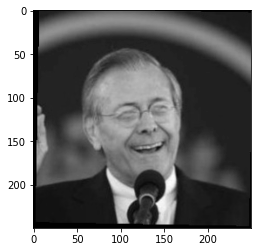

/content/drive/My Drive/Colab Notebooks/lfw_funneled/Donald_Rumsfeld/Donald_Rumsfeld_0120.jpg


In [44]:
# 1.6 sanity checks
print(data.shape)
#see/reconstruct image at 10th row
tmp=data[10,:].reshape((250,250))
plt.imshow(tmp, cmap=plt.get_cmap('gray'))
plt.show()
#see file name 
print(index_file[10])

In [7]:
# Let us store the data and index_file to drive so that we can load them directly
# Pickle Module for (de)serialization: Storing complete Python objects into files and later loading them back
# Pickle Files

import pickle

fName = directory + "data.pkl"
pickle.dump( data, open( fName, "wb" ) )

fName = directory + "index_file.pkl"
pickle.dump( index_file, open( fName, "wb" ) )

# See in the drive folders

# read pkl file back
index_file_pkl = pickle.load( open( fName, "rb" ) )
print(index_file_pkl)
print(index_file)


{0: '/content/drive/My Drive/Colab Notebooks/lfw_funneled/Donald_Rumsfeld/Donald_Rumsfeld_0065.jpg', 1: '/content/drive/My Drive/Colab Notebooks/lfw_funneled/Donald_Rumsfeld/Donald_Rumsfeld_0038.jpg', 2: '/content/drive/My Drive/Colab Notebooks/lfw_funneled/Donald_Rumsfeld/Donald_Rumsfeld_0020.jpg', 3: '/content/drive/My Drive/Colab Notebooks/lfw_funneled/Donald_Rumsfeld/Donald_Rumsfeld_0047.jpg', 4: '/content/drive/My Drive/Colab Notebooks/lfw_funneled/Donald_Rumsfeld/Donald_Rumsfeld_0032.jpg', 5: '/content/drive/My Drive/Colab Notebooks/lfw_funneled/Donald_Rumsfeld/Donald_Rumsfeld_0121.jpg', 6: '/content/drive/My Drive/Colab Notebooks/lfw_funneled/Donald_Rumsfeld/Donald_Rumsfeld_0113.jpg', 7: '/content/drive/My Drive/Colab Notebooks/lfw_funneled/Donald_Rumsfeld/Donald_Rumsfeld_0050.jpg', 8: '/content/drive/My Drive/Colab Notebooks/lfw_funneled/Donald_Rumsfeld/Donald_Rumsfeld_0013.jpg', 9: '/content/drive/My Drive/Colab Notebooks/lfw_funneled/Donald_Rumsfeld/Donald_Rumsfeld_0077.jpg',

### PCA


*   "SKlearn PCA" ---> https://scikit-learn.org/stable/modules/classes.html




In [45]:
# data-preprocesing 
#standerdization 

from sklearn import preprocessing
data_scaled = preprocessing.scale(data)
print(data_scaled.shape)

(1140, 62500)


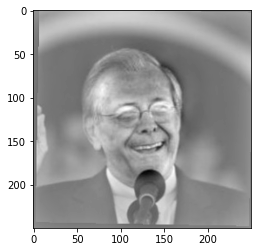

In [46]:
# viz a standarized image
tmp = data_scaled[10,:].reshape((250,250))
plt.imshow(tmp, cmap=plt.get_cmap('gray'))
plt.show()

In [47]:
from sklearn.decomposition import PCA
import time
pca = PCA(n_components = 50)

start_time = time.time()
pca.fit(data_scaled)
end_time = time.time()

print(end_time-start_time)

print(pca)
# project X to the 50 dim space
data_50 = pca.transform(data_scaled)
print(data_50.shape)

8.042919397354126
PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
(1140, 50)


[0.21713431 0.05384902 0.04816181 0.04572267 0.03917343 0.03871815
 0.03189486 0.02045846 0.01826238 0.0180453  0.01678775 0.01428113
 0.01254732 0.01148397 0.01129665 0.00994886 0.00977472 0.00889636
 0.00817784 0.00761779 0.00730427 0.00676213 0.00647152 0.00614104
 0.00595264 0.00523409 0.0050723  0.00473982 0.00452975 0.00441783
 0.00434672 0.0041826  0.00398503 0.00372953 0.00364065 0.00355434
 0.00344763 0.00334403 0.00325441 0.00310695 0.00299541 0.00287286
 0.00278514 0.00270644 0.00265375 0.00256053 0.00252597 0.00248467
 0.00242726 0.00239246]


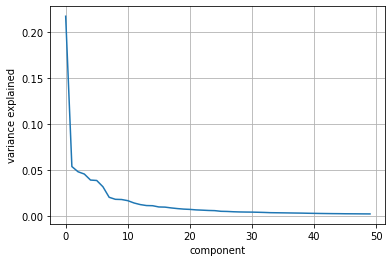

In [48]:
print(pca.explained_variance_ratio_) 

plt.plot(pca.explained_variance_ratio_)
plt.grid()
plt.xlabel('component')
plt.ylabel('variance explained')
plt.show()

(50, 62500)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


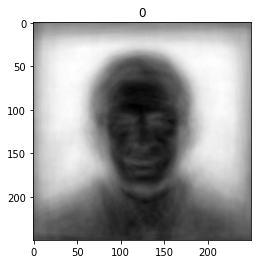

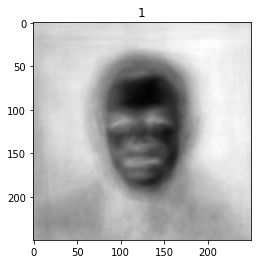

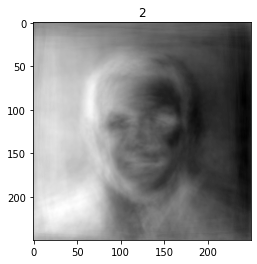

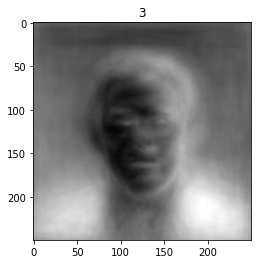

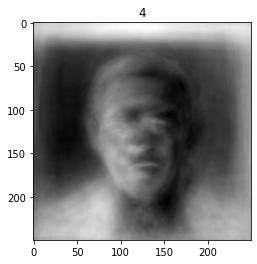

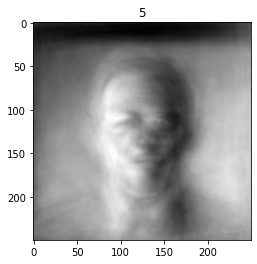

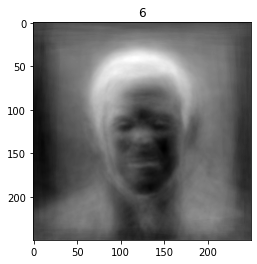

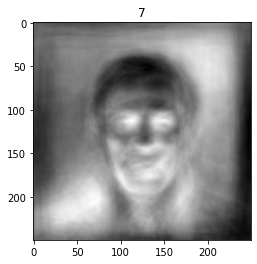

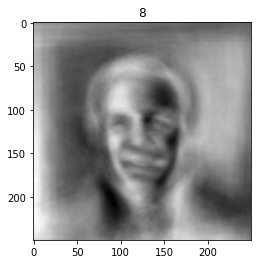

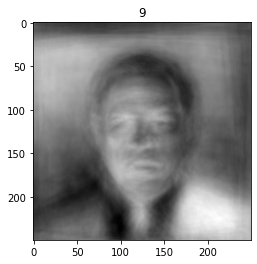

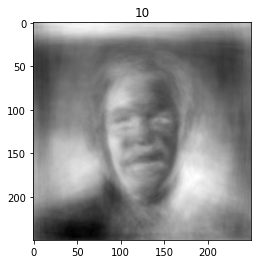

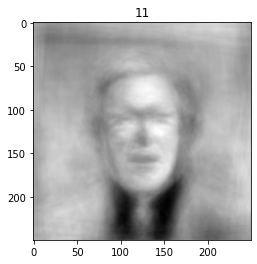

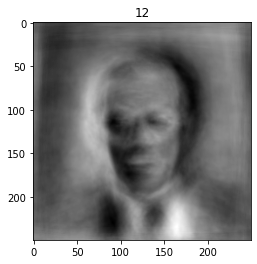

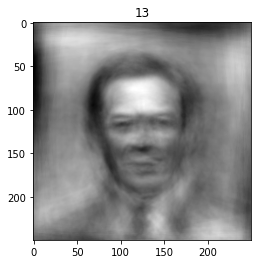

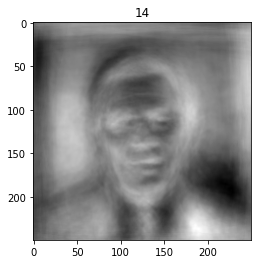

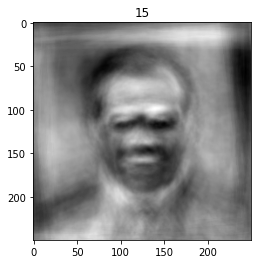

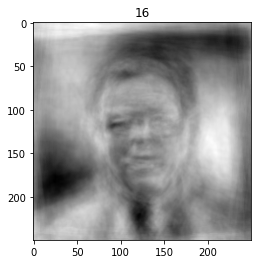

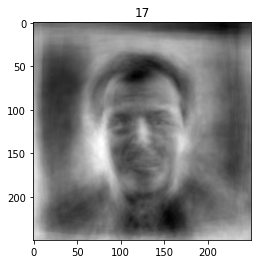

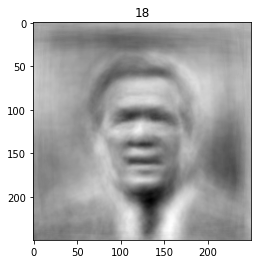

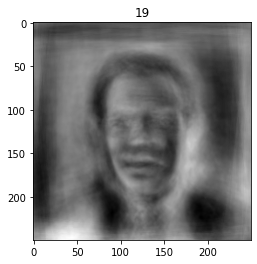

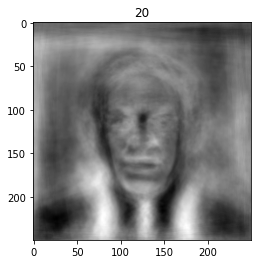

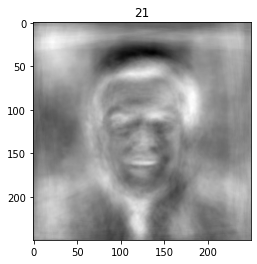

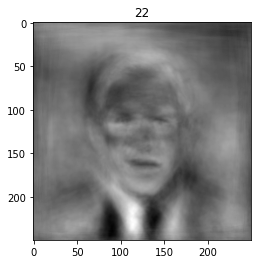

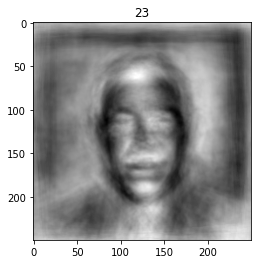

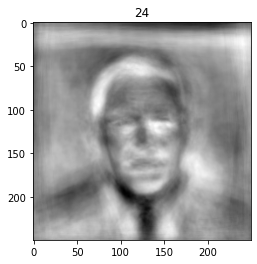

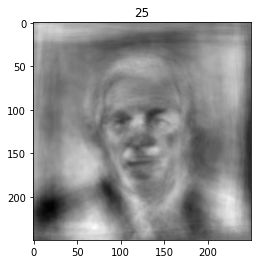

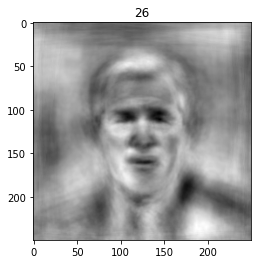

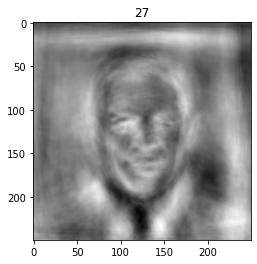

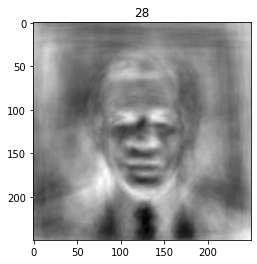

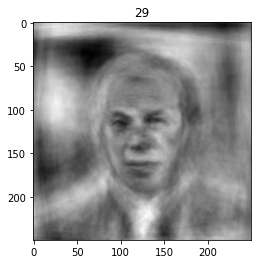

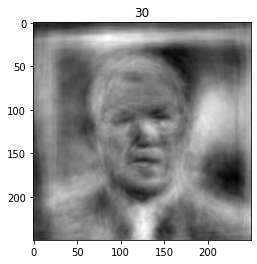

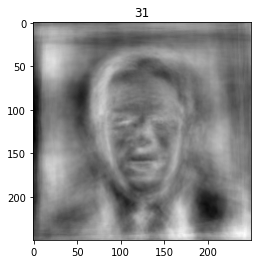

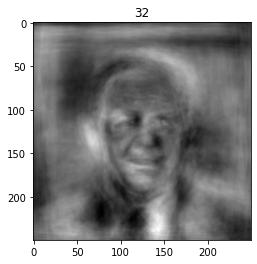

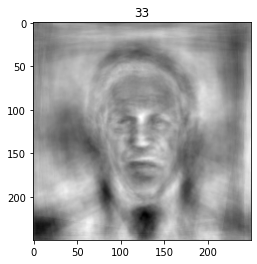

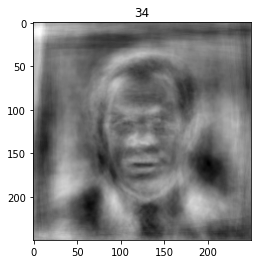

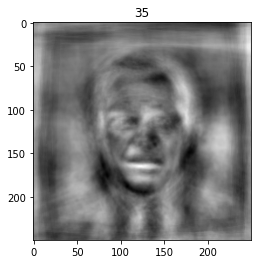

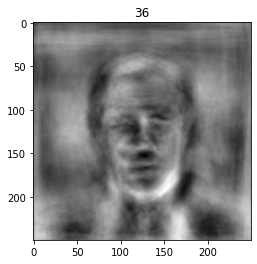

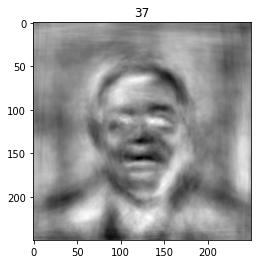

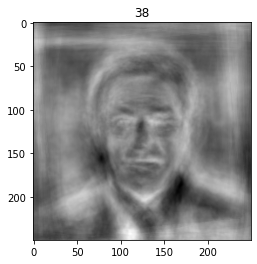

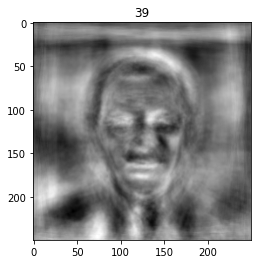

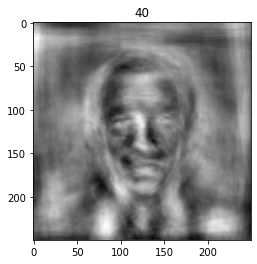

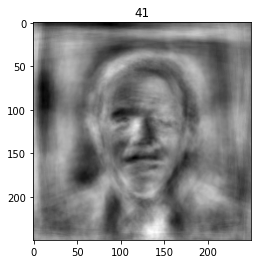

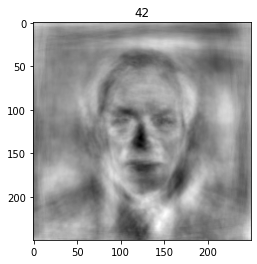

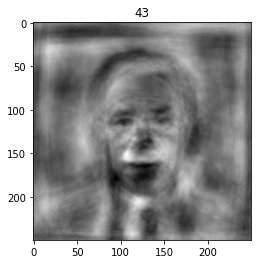

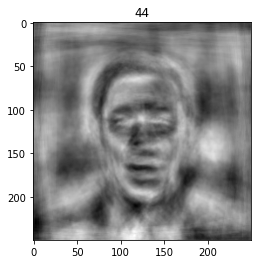

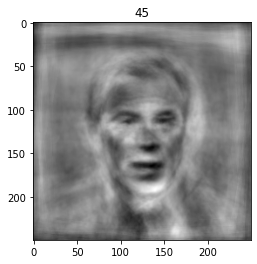

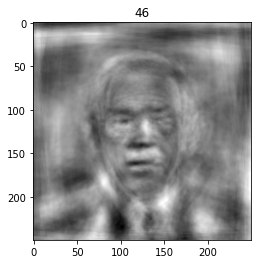

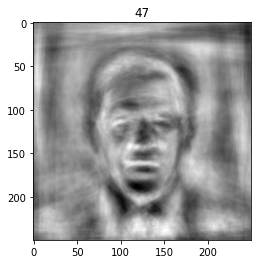

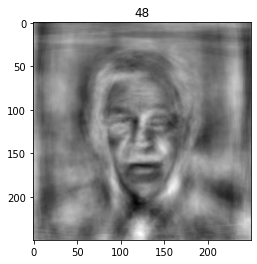

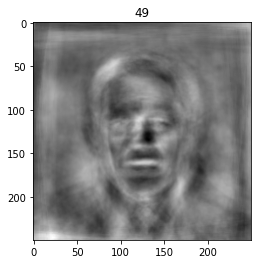

In [49]:
# visualize the images corresponding to the top eigenvectors
print(pca.components_.shape)

# "Subplots in Matplotlib" ---> https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html

for i in range(pca.components_.shape[0]):

  fig = plt.figure(i)
  
  im = np.reshape(pca.components_[i,:],(250,250))
  plt.imshow(im, cmap=plt.get_cmap('gray'))
  plt.title(str(i))

plt.show()

In [50]:
# 2-dim embeddings to visualize the new features
pca.n_components = 2;
print(pca)

data_2 = pca.fit_transform(data_scaled)
print(data_2.shape)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
(1140, 2)


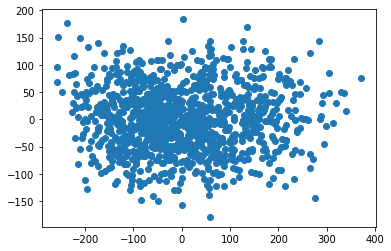

In [51]:
plt.scatter(data_2[:,0],data_2[:,1]) #https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.show()

# from below graph we can't make much sense of what is happening

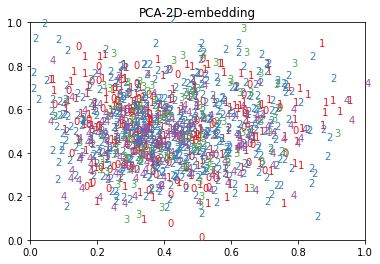

In [52]:
#Plot each 2D point with the correspodning label

# BAsed on https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py
# Made  modifications to above code

def plot_embedding(X, y, title=None):
    # min-max scaling
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),color=plt.cm.Set1(y[i] / 10.),)

    if title is not None:
        plt.title(title)
    plt.show()

plot_embedding(data_2, labels, "PCA-2D-embedding")

### t-SNE

In [53]:
# Load data from SKLearn datasets
# Refer: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html#sklearn.datasets.fetch_lfw_people

from sklearn.datasets import fetch_lfw_people
D = fetch_lfw_people(min_faces_per_person=100) 
print(type(D))

<class 'sklearn.utils.Bunch'>


In [28]:
print((D.data).shape) #D.data is ndarray

(1140, 2914)


In [54]:
X = preprocessing.scale(D.data)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [0]:
y = D.target  #getting all labels

In [31]:
y.shape

(1140,)

In [56]:
#creating ndarray represing how much images each folder contain
(unique, counts) = np.unique(y, return_counts=True) # https://kite.com/python/answers/how-to-count-frequency-of-unique-values-in-a-numpy-array-in-python
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[  0 236]
 [  1 121]
 [  2 530]
 [  3 109]
 [  4 144]]


In [57]:
#Example: https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py
import time
from sklearn import manifold


tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)

start_time = time.time()
X_tsne = tsne.fit_transform(X) # fit and transfrom just like PCA
end_time = time.time()

print(end_time-start_time)


17.488967657089233


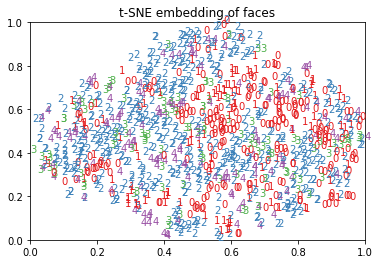

In [59]:
# https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py
# Made  modifications to above code
# Scale and visualize the embedding vectors

def plot_embedding(X, y, title=None):
    # min-max scaling
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),color=plt.cm.Set1(y[i] / 10.),)

    if title is not None:
        plt.title(title)
    plt.show()
plot_embedding(X_tsne, y,"t-SNE embedding of faces" )

# Decent result. Better than PCA.

* here we are compeletely ignoring the spatial-properties of images in our system since we are flatening our 2d image into flatted 1d array ignoring any spatial inter-ralation.using cnn can solve this problem.



